In [30]:
netlist_data = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid        3  5 
L1                 3         1   #SQUIDL(1.75)pH fcheck
L2                 3         4   #SQUIDL(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA(v=0.49, shunt = JJSHUNT)
R1                 1         5   #JJSHUNT(16)ohm
B2                 2         5  jjmod area=#JJAREA(v=0.49)
R2                 2         5   #JJSHUNT(16)ohm
B3                 4         2  pjjmod area=#PJJAREA(20, fix = true)
.ends
* ============================================

.subckt JTL     1  5  100
L1               1  2   #JTLL1(18)pH fcheck
L2               2  3   #JTLL1(18)pH fcheck
L3               3  4   #JTLL1(18)pH fcheck
L4               4  5   #JTLL1(18)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  2   #JTLR1(100)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin1                    1    0   PWL(0ps 0mV  600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV  800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV  1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
X1    psquid            1    0
L1                      1    2      10pH fcheck
R1                      2    100    100ohm
L2                      2    3      10pH fcheck
X2    psquid            3    0
R3                      3     13  8.32ohm
L3                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.4,fix = true)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1
.print phase B2|X1

.print phase B1|X2
.print phase B2|X2

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [31]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, True)

--- List of variables to optimize ---
            def    main     sub element    fix    shunt    dp  dpv  tmp
char                                                                   
SQUIDL     1.75    1.75    1.75       L    0.0     None   1.0  7.0  0.0
JJAREA     0.49    0.49    0.49       B  False  JJSHUNT  True  7.0  0.0
JJSHUNT   16.00   16.00   16.00       R  False     None  True  7.0  0.0
PJJAREA   20.00   20.00   20.00       B   True     None  True  7.0  0.0
JTLL1     18.00   18.00   18.00       L  False     None  True  7.0  0.0
JTLR1    100.00  100.00  100.00       R  False     None  True  7.0  0.0
BIAS       1.40    1.40    1.40       V   True     None  True  7.0  0.0


--- Period to calculate the initial value of bias ---
1e-10  ~  4e-10


--- SQUID used for judging the operation ---
[['P(B1|X1)', 'P(B2|X1)'], ['P(B1|X2)', 'P(B2|X2)']]






.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid        3  5 
L1                 3         1   1.75pH fcheck
L2                 3         4   1.75pH fcheck
B1                 1         5  jjmod area=0.49
R1                 1         5   16.0ohm
B2                 2         5  jjmod area=0.49
R2                 2         5   16.0ohm
B3                 4         2  pjjmod area=20.0
.ends
* ============================================

.subckt JTL     1  5  100
L1               1  2   18.0pH fcheck
L2               2  3   18.0pH fcheck
L3               3  4   18.0pH fcheck
L4               4  5   18.0pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   100.0ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL    

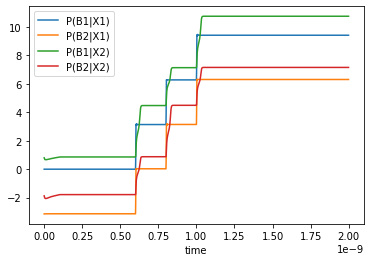

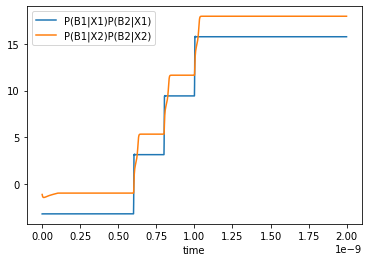

In [32]:
d.default_simulation(True)

In [15]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/optimize-data10')




ばらつき0 : 0回目の最適化開始
最小マージン :  JJAREA    21.875000000000004
ばらつき0 : 0回目の最適化終了
ばらつき0 : 1回目の最適化開始


KeyboardInterrupt: 

In [ ]:
# margin.plot(res)